In [76]:
from click import style
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [77]:
x = np.array([3.5, 1.1, 3.2, 2.8, 6.7, 4.4, 0.9, 2.2])
np.mean(x)

3.1

In [78]:
np.median(x)

3.0

In [79]:
x.min(), x.max()

(0.9, 6.7)

In [80]:
x.var(), x.std(), x.var(ddof=1), x.std(ddof=1)

(3.0700000000000007,
 1.7521415467935233,
 3.5085714285714293,
 1.8731181032095732)

In [81]:
np.random.rand(),np.random.randn()

(0.6052140402534445, -0.21575140675463128)

In [82]:
np.random.rand(5),np.random.randn(2, 4)

(array([0.8055911 , 0.10387398, 0.54004057, 0.97325737, 0.93673572]),
 array([[-0.57190062, -1.1624698 , -0.0854036 ,  1.50097279],
        [-0.49791767, -1.35865878,  0.00437921,  0.2871474 ]]))

In [83]:
np.random.randint(10, size=10)

array([9, 8, 6, 4, 1, 4, 1, 6, 2, 0])

In [84]:
np.random.randint(low=10, high=20, size=(2,10))

array([[12, 15, 18, 17, 10, 12, 19, 17, 12, 18],
       [13, 14, 13, 16, 10, 10, 19, 12, 16, 13]])

Text(0.5, 1.0, 'randint(low=1, high=10)')

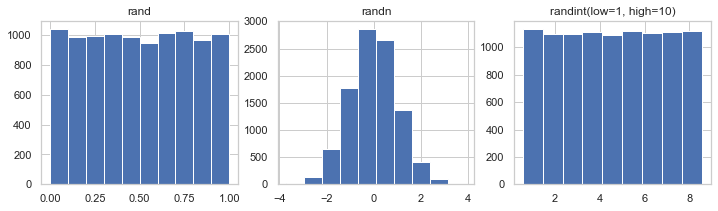

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(np.random.rand(10000))
axes[0].set_title("rand")
axes[1].hist(np.random.randn(10000))
axes[1].set_title("randn")
axes[2].hist(np.random.randint(low=1, high=10, size=10000), bins=9, align='left')
axes[2].set_title("randint(low=1, high=10)")

In [86]:
np.random.choice(10, 5, replace=False)

array([3, 2, 5, 8, 0])

In [87]:
np.random.seed(123456789)
np.random.rand()

0.532833024789759

In [88]:
np.random.seed(123456789); np.random.rand()

0.532833024789759

In [89]:
prng = np.random.RandomState(123456789)
prng.randn(2, 4)

array([[ 2.212902  ,  2.1283978 ,  1.8417114 ,  0.08238248],
       [ 0.85896368, -0.82601643,  1.15727052,  1.37591514]])

In [90]:
prng.chisquare(1, size=(2, 2))

array([[1.26859720e+00, 2.02731988e+00],
       [2.52605129e-05, 3.00376585e-04]])

In [91]:
prng.standard_t(1, size=(2, 3))

array([[ 0.59734384, -1.27669959,  0.09724793],
       [ 0.22451466,  0.39697518, -0.19469463]])

In [92]:
prng.f(5, 2, size=(2, 4))

array([[ 0.77372119,  0.1213796 ,  1.64779052,  1.21399831],
       [ 0.45471421, 17.64891848,  1.48620557,  2.55433261]])

In [93]:
prng.binomial(10, 0.5, size=10)

array([8, 3, 4, 2, 4, 5, 4, 4, 7, 5])

In [94]:
prng.poisson(5, size=10)

array([7, 1, 3, 4, 6, 4, 9, 7, 3, 6])

### 확률 변수 및 분포

In [95]:
X = stats.norm(1, 0.5)
X.mean(), X.median(), X.std(), X.var()

(1.0, 1.0, 0.5, 0.25)

In [96]:
[X.moment(n) for n in range(5)]

[1.0, 1.0, 1.25, 1.75, 2.6875]

In [97]:
X.stats()

(array(1.), array(0.25))

In [98]:
X.pdf([0, 1, 2])

array([0.10798193, 0.79788456, 0.10798193])

In [99]:
X.cdf([0, 1, 2])

array([0.02275013, 0.5       , 0.97724987])

In [100]:
X.interval(0.95)

(0.020018007729972975, 1.979981992270027)

In [101]:
X.interval(0.99)

(-0.2879146517744502, 2.28791465177445)

In [102]:
def plot_rv_distribution(X, axes=None):
    """Plot the PDF, CDF, SF and PPF of a given random variable"""
    if axes is None:
        fig, axes = plt.subplots(1, 3, figsize=(12, 3))
    
    x_min_999, x_max_999 = X.interval(0.999)
    x999 = np.linspace(x_min_999, x_max_999, 1000)

    x_min_95, x_max_95 = X.interval(0.95)
    x95 = np.linspace(x_min_95, x_max_95, 1000)

    if hasattr(X.dist, 'pdf'):
        axes[0].plot(x999, X.pdf(x999), label="PDF")
        axes[0].fill_between(x95, X.pdf(x95), alpha=0.25)
    else:
        x999_int = np.unique(x999.astype(int))
        axes[0].bar(x999_int, X.pmf(x999_int), label="PMF")
    axes[1].plot(x999, X.cdf(x999), label="CDF")
    axes[1].plot(x999, X.sf(x999), label="SF")
    axes[2].plot(x999, X.ppf(x999), label="PPF")
    
    for ax in axes:
        ax.legend()


Text(0, 0.5, 'Poisson dist.')

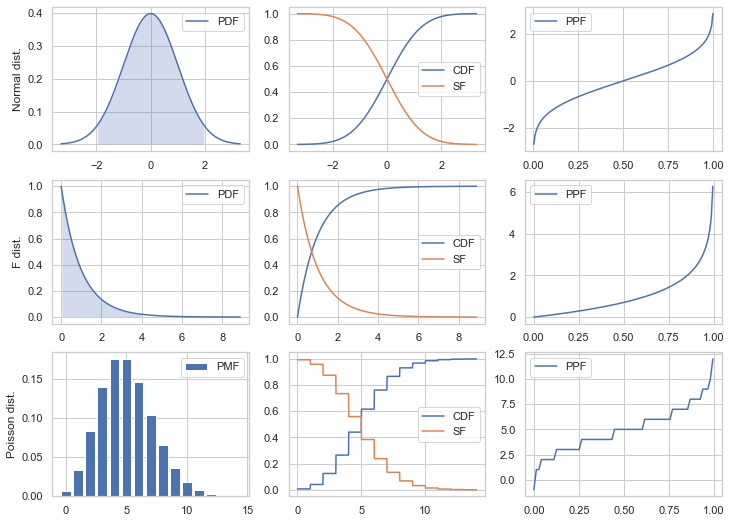

In [103]:
fig, axes = plt.subplots(3, 3, figsize=(12, 9))

X = stats.norm()
plot_rv_distribution(X, axes=axes[0, :])
axes[0, 0].set_ylabel("Normal dist.")
X = stats.f(2, 50)
plot_rv_distribution(X, axes=axes[1, :])
axes[1, 0].set_ylabel("F dist.")
X = stats.poisson(5)
plot_rv_distribution(X, axes=axes[2, :])
axes[2, 0].set_ylabel("Poisson dist.")


In [104]:
stats.norm.stats(loc=2, scale=0.5)

(array(2.), array(0.25))

In [105]:
stats.norm(loc=1, scale=0.5).stats()

(array(1.), array(0.25))

In [106]:
X = stats.norm(1, 0.5)
X.rvs(10)

array([1.43841711, 2.56662976, 0.50437638, 1.43558405, 1.24249875,
       1.15962805, 1.2265658 , 0.54154384, 1.66932021, 1.42933398])

In [107]:
def plot_dist_samples(X, X_samples, title=None, ax=None):
    """ Plot the PDF and histogram of samples of a continuous random variable"""
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))

    x_lim = X.interval(.99)
    x = np.linspace(*x_lim, num=100)

    ax.plot(x, X.pdf(x), label="PDF", lw=3)    
    # 라이브러리 업데이트로 normed속성을 density로 바꾸고 stacked 속성 추가
    ax.hist(X_samples, label="samples", density=True, bins=75, stacked=True) 
    ax.set_xlim(*x_lim)
    ax.legend()
    
    if title:
        ax.set_title(title)
    return ax

<AxesSubplot:title={'center':'exponential dist.'}>

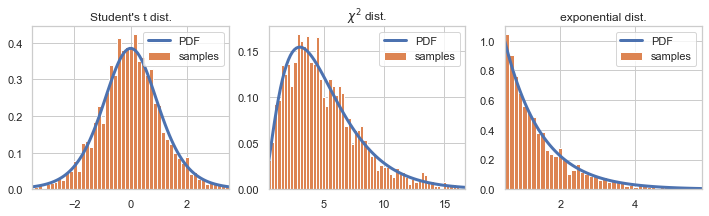

In [108]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
N = 2000
X = stats.t(7.0)
plot_dist_samples(X, X.rvs(N), "Student's t dist.", ax=axes[0])
X = stats.chi2(5.0)
plot_dist_samples(X, X.rvs(N), r"$\chi^2$ dist.", ax=axes[1])
X = stats.expon(0.5)
plot_dist_samples(X, X.rvs(N), "exponential dist.", ax=axes[2])

In [109]:
X = stats.chi2(df=5)
X_samples = X.rvs(500)
df, loc, scale = stats.chi2.fit(X_samples)
df, loc, scale

(4.528531755581526, 0.1453941955212967, 1.1094036952339144)

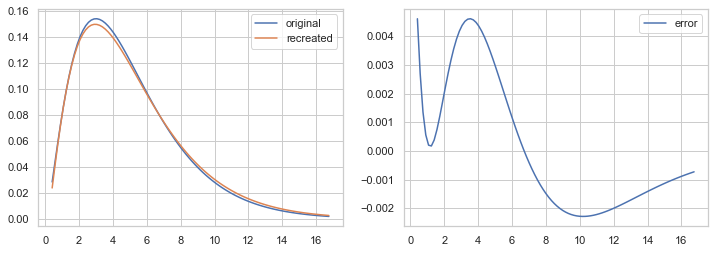

In [110]:
Y = stats.chi2(df=df, loc=loc, scale=scale)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

x_lim = X.interval(.99)
x = np.linspace(*x_lim, num=100)

axes[0].plot(x, X.pdf(x), label="original")
axes[0].plot(x, Y.pdf(x), label="recreated")
axes[0].legend()

axes[1].plot(x, X.pdf(x) - Y.pdf(x), label="error")
axes[1].legend()

### 가설 검정

In [111]:
mu0, mu, sigma = 1.0, 0.8, 0.5
X = stats.norm(mu, sigma)
n =100
X_samples = X.rvs(n)

In [112]:
z = (X_samples.mean() - mu0)/(sigma/np.sqrt(n))
z

-4.915637976521836

In [113]:
t = (X_samples.mean() - mu0)/(X_samples.std(ddof=1)/np.sqrt(n))
t

-4.883742747891776

In [114]:
stats.norm().ppf(0.025)

-1.9599639845400545

In [115]:
2 * stats.norm().cdf(-abs(z))

8.849379778846592e-07

In [116]:
2 * stats.t(df=(n-1)).cdf(-abs(t))

4.002543252096778e-06

In [117]:
t, p = stats.ttest_1samp(X_samples, mu0)
t, p

(-4.883742747891776, 4.002543252096778e-06)

c:\Users\LG\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


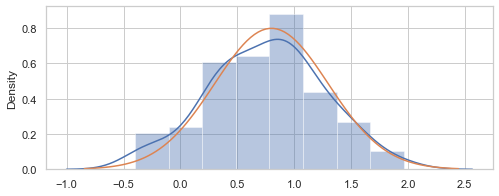

In [118]:
fig, ax = plt.subplots(figsize=(8, 3))

sns.distplot(X_samples, ax=ax)
x = np.linspace(*X.interval(0.999), num=100)
ax.plot(x, stats.norm(loc=mu, scale=sigma).pdf(x))

In [119]:
n, sigma = 50, 1.0
mu1, mu2 = np.random.rand(2)
X1 = stats.norm(mu1, sigma)
X1_sample = X1.rvs(n)
X2 = stats.norm(mu2, sigma)
X2_sample = X2.rvs(n)

t, p = stats.ttest_ind(X1_sample, X2_sample)
t, p

(3.159596504360957, 0.002101524044318263)

In [120]:
mu1, mu2

(0.9002968998016874, 0.4690011995884138)

### 비매개변수 기법

In [121]:
X = stats.chi2(df=5)
X_samples = X.rvs(100)

kde = stats.kde.gaussian_kde(X_samples)
kde_low_bw = stats.kde.gaussian_kde(X_samples, bw_method=0.25)


c:\Users\LG\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

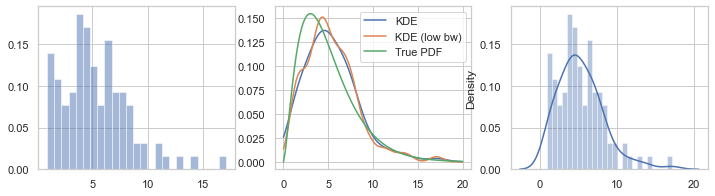

In [122]:
x = np.linspace(0, 20, 100)
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

axes[0].hist(X_samples, density=True, stacked=True, alpha=0.5, bins=25)
axes[1].plot(x, kde(x), label="KDE")
axes[1].plot(x, kde_low_bw(x), label="KDE (low bw)")
axes[1].plot(x, X.pdf(x), label="True PDF")
axes[1].legend()
sns.distplot(X_samples, bins=25, ax=axes[2])

In [123]:
kde.resample(10)

array([[8.15047721, 5.7798197 , 7.62567558, 7.1776504 , 5.30703486,
        5.34635937, 0.79007269, 7.95342713, 7.89838973, 5.99040865]])

In [124]:
def _kde_cdf(x):
    return kde.integrate_box_1d(-np.inf, x)
kde_cdf = np.vectorize(_kde_cdf)

In [125]:
def _kde_ppf(q):
    return optimize.fsolve(lambda x, q: kde_cdf(x) - q, kde.dataset.mean(), args=(q,))[0]
kde_ppf = np.vectorize(_kde_ppf)

In [126]:
kde_ppf([0.05, 0.95])

array([ 0.83543261, 11.03990386])